<a href="https://colab.research.google.com/github/RiaKokate/GIS/blob/main/ps4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

India’s Socio-Demographic Landscape: Insights on Literacy, Unemployment, Population, Life Expectancy and Health



*   MAP 1 - Population Distribution
*   MAP 2 - What does the map reveal about the relationship between male and female populations across Indian states?
*   MAP 3 - How does life expectancy vary across Indian states, and how does it compare to national and global averages?
*   MAP 4 - How did the literacy rates (or similar metric) change across Indian states and union territories between 2001 and 2011?
*   MAP 5 - Which Indian states and union territories showed the highest and lowest percentage literacy changes in the observed metric over time?
*   MAP 6 - How do unemployment rates and literacy rates vary across Indian states?








In [1]:
import os, zipfile #basics
import pandas as pd #data management
import matplotlib.pyplot as plt #vis
#!pip install geopandas matplotlib folium

import geopandas as gpd #gis/maps

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files #to download from colab onto hd

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )
!pip install mapclassify
import mapclassify #need for thematic map classification

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 2.7 MB/s eta 0:00:00


<ipython-input-2-b4a011c229e8>:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(state.geometry.centroid.x, state.geometry.centroid.y, state.index):


Text(92.95416917579702, 11.251254620247064, 'Andaman & Nicobar Islands')

Text(79.93853171212928, 15.720834790999023, 'Andhra Pradesh')

Text(94.668910874035, 28.033962609584332, 'Arunachal Pradesh')

Text(92.83045940616553, 26.35454422223792, 'Assam')

Text(85.61241735400695, 25.67882352629448, 'Bihar')

Text(76.78118659580647, 30.726646702984183, 'Chandigarh')

Text(82.0427967633929, 21.26651578281386, 'Chhatisgarh')

Text(73.07314531316155, 20.195276782278555, 'Dadra & Nagar Haveli')

Text(72.19505608644653, 20.519690506709054, 'Daman & Diu')

Text(74.05421647573245, 15.362577876256886, 'Goa')

Text(71.5823349542557, 22.692057002529683, 'Gujarat')

Text(76.3415634683103, 29.196577826358023, 'Haryana')

Text(77.25015924312235, 31.923289228796904, 'Himachal Pradesh')

Text(74.98103250445575, 34.9155645450377, 'Jammu & Kashmir')

Text(85.56361107879786, 23.656365394485576, 'Jharkhand')

Text(76.16892046992957, 14.707341200973518, 'Karnataka')

Text(76.4088995448608, 10.447265426600186, 'Kerala')

Text(78.1257714184849, 34.26727551795944, 'Ladakh')

Text(72.39288959511175, 11.165558419269818, 'Lakshadweep')

Text(78.29091739839816, 23.539056741795154, 'Madhya Pradesh')

Text(76.108622366791, 19.45080478131078, 'Maharashtra')

Text(93.88394403359034, 24.731636097944936, 'Manipur')

Text(91.27937343789137, 25.536598488718305, 'Meghalaya')

Text(92.82891644593408, 23.307804507645105, 'Mizoram')

Text(77.1158839628838, 28.64296535583275, 'NCT of Delhi')

Text(94.4720467977596, 26.059338892497465, 'Nagaland')

Text(84.42633112773939, 20.510498661769226, 'Orissa')

Text(79.97389757987564, 12.19157366652861, 'Pondicherry')

Text(75.41747841633013, 30.843241653489148, 'Punjab')

Text(73.84870021890411, 26.584493468014, 'Rajasthan')

Text(88.4759582817844, 27.57122829018626, 'Sikkim')

Text(78.41117400974142, 11.014339054375457, 'Tamil Nadu')

Text(79.06562712463464, 17.799902169177287, 'Telangana')

Text(91.74011046028058, 23.74652193851426, 'Tripura')

Text(80.56755354378018, 26.922318763397673, 'Uttar Pradesh')

Text(79.20557348171532, 30.15439772926958, 'Uttarakhand')

Text(88.00274608897293, 23.725064806001043, 'West Bengal')

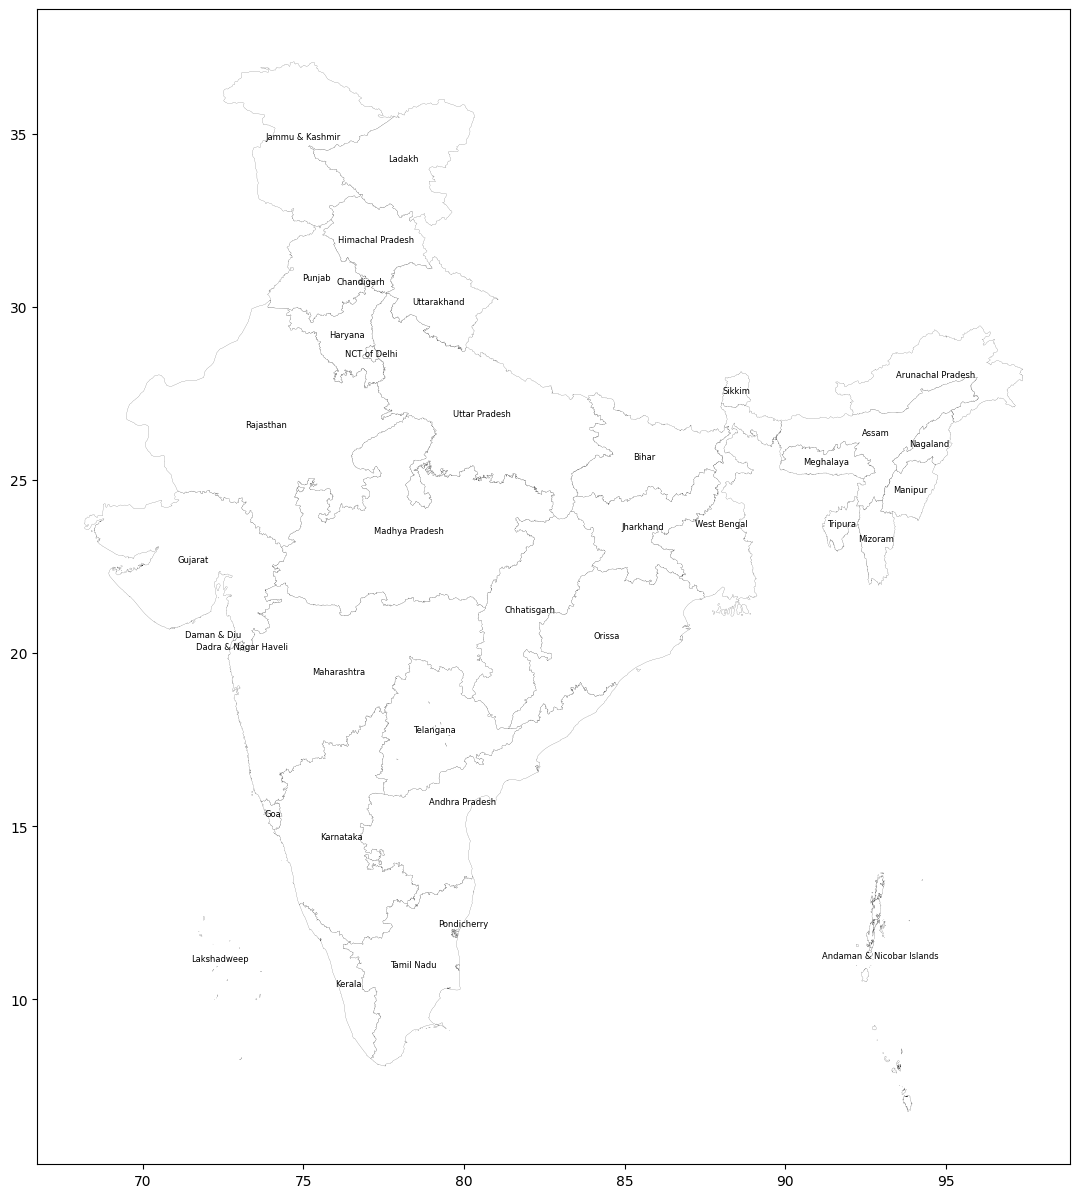

In [2]:
! wget -q -O IND.zip https://docs.google.com/uc?id=1Dnztw_oqA4mfdYj59XSgPfRIaxDMoqss&export=download
zip_ref = zipfile.ZipFile('IND.zip', 'r'); zip_ref.extractall(); zip_ref.close()
IND= gpd.read_file('INDIA-MAP.shp')

state = IND.dissolve(by='statename')
ax = state.plot(color='white', edgecolor='black', figsize=(15, 15),    linewidth=0.1, # Outline color
)
for x, y, label in zip(state.geometry.centroid.x, state.geometry.centroid.y, state.index):
    ax.text(x, y, label, fontsize=6, ha='center', va='center')

<Axes: >

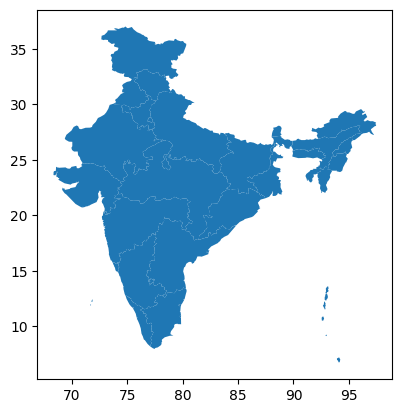

In [3]:
! wget -q -O india.zip https://drive.google.com/uc?id=1LoB2HIRIRQc7Gdp36MHmMZ4rbnsiBWMt&export=Download

zip_ref = zipfile.ZipFile('india.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
india=gpd.read_file('India Shape/india_st.shp') #load the shapefile with gpd as nj_counties

india.plot()

In [4]:
india.head(1)

,STATE,geometry
0,ANDAMAN AND NICOBAR ISLANDS,"MULTIPOLYGON (((94.08923 6.73365, 93.97717 6.9..."


Text(93.0982717484026, 11.343336275425425, 'ANDAMAN AND NICOBAR ISLANDS')

Text(79.59617565014507, 16.54332351357065, 'ANDHRA PRADESH')

Text(94.72733225220136, 28.132528223976607, 'ARUNACHAL PRADESH')

Text(92.9271388470492, 26.397612497881088, 'ASSAM')

Text(85.60796963252363, 24.718691934983056, 'BIHAR')

Text(76.77406498123801, 30.716554414910618, 'CHANDIGARH')

Text(73.10007599890547, 20.197034813921043, 'DADRA AND NAGAR HAVELI')

Text(71.97455336300608, 20.55789799428087, 'DAMAN AND DIU')

Text(77.08704103020217, 28.602072083431086, 'DELHI')

Text(74.03414117560216, 15.365367865772017, 'GOA')

Text(71.65124221889216, 22.721167592967742, 'GUJARAT')

Text(76.30465178511314, 29.162744532604105, 'HARYANA')

Text(77.27558410169368, 31.87136905223448, 'HIMACHAL PRADESH')

Text(76.39163105716874, 34.58588528557358, 'JAMMU AND KASHMIR')

Text(76.14916071510407, 14.682612175259626, 'KARNATAKA')

Text(76.37387129331003, 10.391895574912503, 'KERALA')

Text(71.80026872369396, 12.188587089931795, 'LAKSHADWEEP')

Text(79.41696212347553, 22.80833866137315, 'MADHYA PRADESH')

Text(76.1438339700071, 19.429537665139527, 'MAHARASHTRA')

Text(94.01247150568696, 24.776671774599833, 'MANIPUR')

Text(91.36332965049762, 25.542953942070472, 'MEGHALAYA')

Text(92.76087072248562, 23.31719921847137, 'MIZORAM')

Text(94.57258877204666, 26.12079091636268, 'NAGALAND')

Text(84.41680687342608, 20.454856561482977, 'ORISSA')

Text(79.68934352656893, 12.260380305842233, 'PONDICHERRY')

Text(75.42872602123485, 30.825424524824914, 'PUNJAB')

Text(73.78665732026214, 26.56465641532147, 'RAJASTHAN')

Text(88.50688632356626, 27.55312012000883, 'SIKKIM')

Text(78.38979381125563, 10.948648310179593, 'TAMIL NADU')

Text(91.73704466484084, 23.749481177287453, 'TRIPURA')

Text(80.30793542363828, 27.444972964941414, 'UTTAR PRADESH')

Text(87.95797392206615, 23.836746996390776, 'WEST BENGAL')

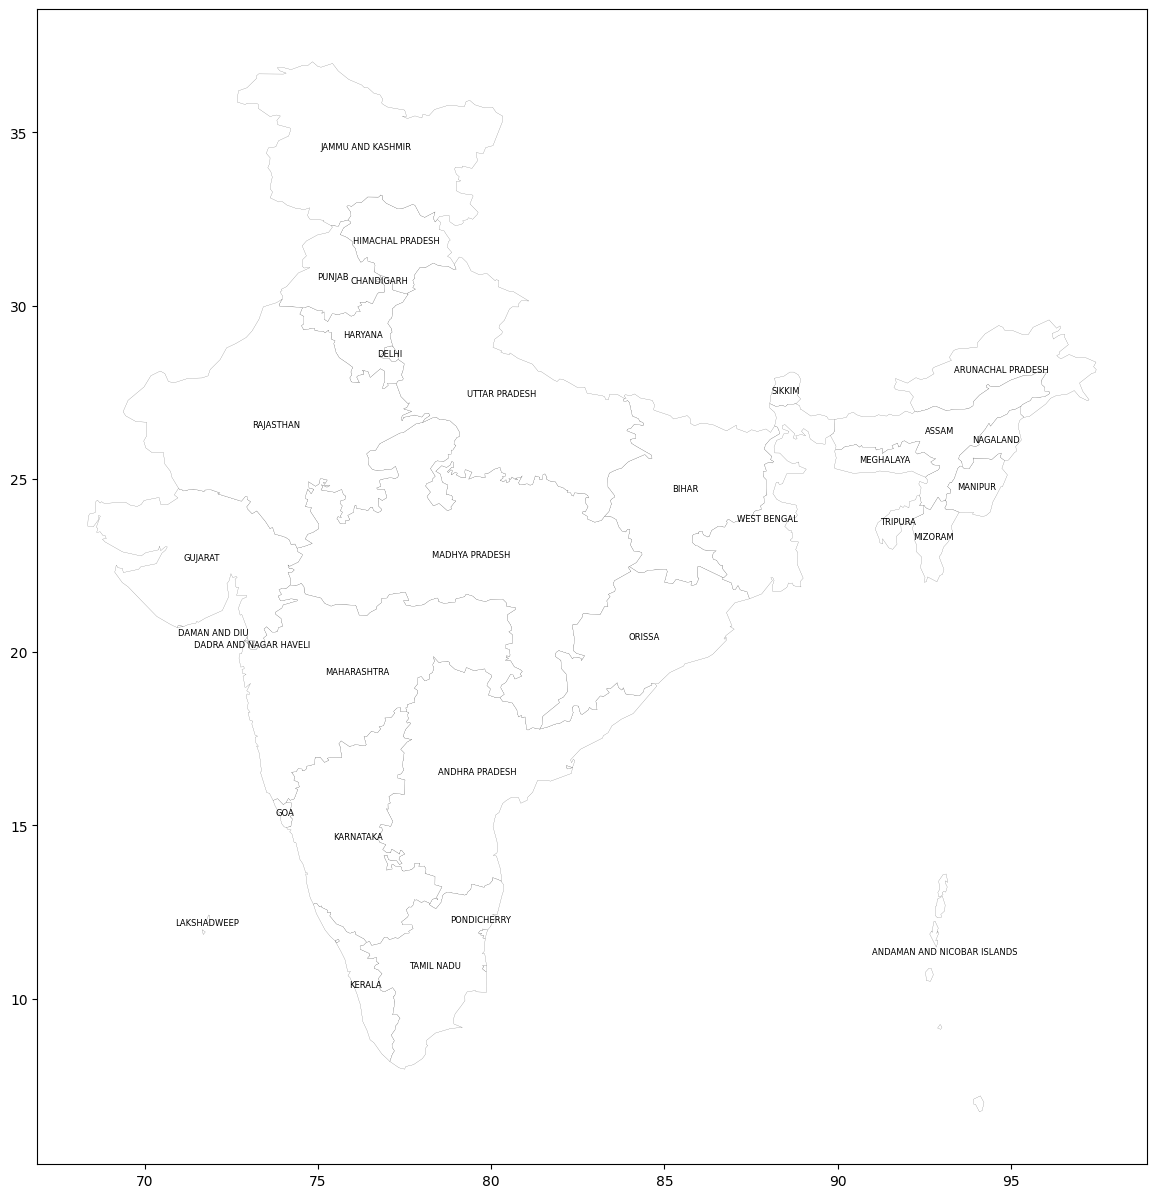

In [5]:
ax = india.plot(color='white', edgecolor='black', figsize=(15, 15),   linewidth=0.1, # Outline color
)
for x, y, label in zip(india.geometry.centroid.x, india.geometry.centroid.y, india['STATE']):
    ax.text(x, y, label, fontsize=6, ha='center', va='center')

# 1. Population

---




1.1 Population Distribution

In [6]:
! wget -q -O population.csv https://docs.google.com/uc?id=1UGP--8ioO9qDAWlahdsLN69h0Be6tEXe&export=download
pop = pd.read_csv('population.csv')
pop.head(5)

,S.No,State,total_population,population_male,population_female
0,1,MAHARASHTRA,37722136,19961736,17760400
1,2,UTTAR PRADESH,25302925,13433369,11869556
2,3,ANDHRA PRADESH,18171615,9192368,8979247
3,4,WEST BENGAL,18063509,9357777,8705732
4,5,GUJARAT,17835049,9541688,8293361


In [7]:
print("Shapefile Columns:", india.columns)
print("Population Data Columns:", pop.columns)

Shapefile Columns: Index(['STATE', 'geometry'], dtype='object')
Population Data Columns: Index(['S.No', 'State', 'total_population', 'population_male',
       'population_female'],
      dtype='object')


In [8]:
pop.rename(columns={'State': 'STATE'}, inplace=True)
india['STATE'] = india['STATE'].str.strip().str.upper()
pop['STATE'] = pop['STATE'].str.strip().str.upper()

merged_data = india.merge(pop[['STATE', 'total_population', 'population_male', 'population_female']],
                        on='STATE', how='left')
print(merged_data.head())

                         STATE  \
0  ANDAMAN AND NICOBAR ISLANDS   
1               ANDHRA PRADESH   
2            ARUNACHAL PRADESH   
3                        ASSAM   
4                        BIHAR   

                                            geometry  total_population  \
0  MULTIPOLYGON (((94.08923 6.73365, 93.97717 6.9...               NaN   
1  POLYGON ((82.00063 17.95354, 82.11718 18.02457...        18171615.0   
2  POLYGON ((95.61476 27.34745, 95.69234 27.33888...               NaN   
3  POLYGON ((92.82207 25.57781, 92.69672 25.61368...         1391154.0   
4  POLYGON ((84.16946 26.28322, 83.91399 26.38523...         6714516.0   

   population_male  population_female  
0              NaN                NaN  
1        9192368.0          8979247.0  
2              NaN                NaN  
3         720132.0           671022.0  
4        3558722.0          3155794.0  


In [9]:
india['STATE'] = india['STATE'].replace('JAMMU AND KASHMIR', 'J&K')
pop['STATE'] = pop['STATE'].replace('JAMMU AND KASHMIR', 'J&K')

india['STATE'] = india['STATE'].replace('ANDAMAN AND NICOBAR ISLANDS', 'ANDAMAN & NICOBAR ISLANDS')
pop['STATE'] = pop['STATE'].replace('ANDAMAN AND NICOBAR ISLANDS', 'ANDAMAN & NICOBAR ISLANDS')

merged_data = india.merge(pop[['STATE', 'total_population', 'population_male', 'population_female']],
                        on='STATE', how='left')

Text(93.0982717484026, 11.343336275425425, 'ANDAMAN & NICOBAR ISLANDS')

Text(79.59617565014507, 16.54332351357065, 'ANDHRA PRADESH')

Text(94.72733225220136, 28.132528223976607, 'ARUNACHAL PRADESH')

Text(92.9271388470492, 26.397612497881088, 'ASSAM')

Text(85.60796963252363, 24.718691934983056, 'BIHAR')

Text(76.77406498123801, 30.716554414910618, 'CHANDIGARH')

Text(73.10007599890547, 20.197034813921043, 'DADRA AND NAGAR HAVELI')

Text(71.97455336300608, 20.55789799428087, 'DAMAN AND DIU')

Text(77.08704103020217, 28.602072083431086, 'DELHI')

Text(74.03414117560216, 15.365367865772017, 'GOA')

Text(71.65124221889216, 22.721167592967742, 'GUJARAT')

Text(76.30465178511314, 29.162744532604105, 'HARYANA')

Text(77.27558410169368, 31.87136905223448, 'HIMACHAL PRADESH')

Text(76.39163105716874, 34.58588528557358, 'J&K')

Text(76.14916071510407, 14.682612175259626, 'KARNATAKA')

Text(76.37387129331003, 10.391895574912503, 'KERALA')

Text(71.80026872369396, 12.188587089931795, 'LAKSHADWEEP')

Text(79.41696212347553, 22.80833866137315, 'MADHYA PRADESH')

Text(76.1438339700071, 19.429537665139527, 'MAHARASHTRA')

Text(94.01247150568696, 24.776671774599833, 'MANIPUR')

Text(91.36332965049762, 25.542953942070472, 'MEGHALAYA')

Text(92.76087072248562, 23.31719921847137, 'MIZORAM')

Text(94.57258877204666, 26.12079091636268, 'NAGALAND')

Text(84.41680687342608, 20.454856561482977, 'ORISSA')

Text(79.68934352656893, 12.260380305842233, 'PONDICHERRY')

Text(75.42872602123485, 30.825424524824914, 'PUNJAB')

Text(73.78665732026214, 26.56465641532147, 'RAJASTHAN')

Text(88.50688632356626, 27.55312012000883, 'SIKKIM')

Text(78.38979381125563, 10.948648310179593, 'TAMIL NADU')

Text(91.73704466484084, 23.749481177287453, 'TRIPURA')

Text(80.30793542363828, 27.444972964941414, 'UTTAR PRADESH')

Text(87.95797392206615, 23.836746996390776, 'WEST BENGAL')

<Axes: >

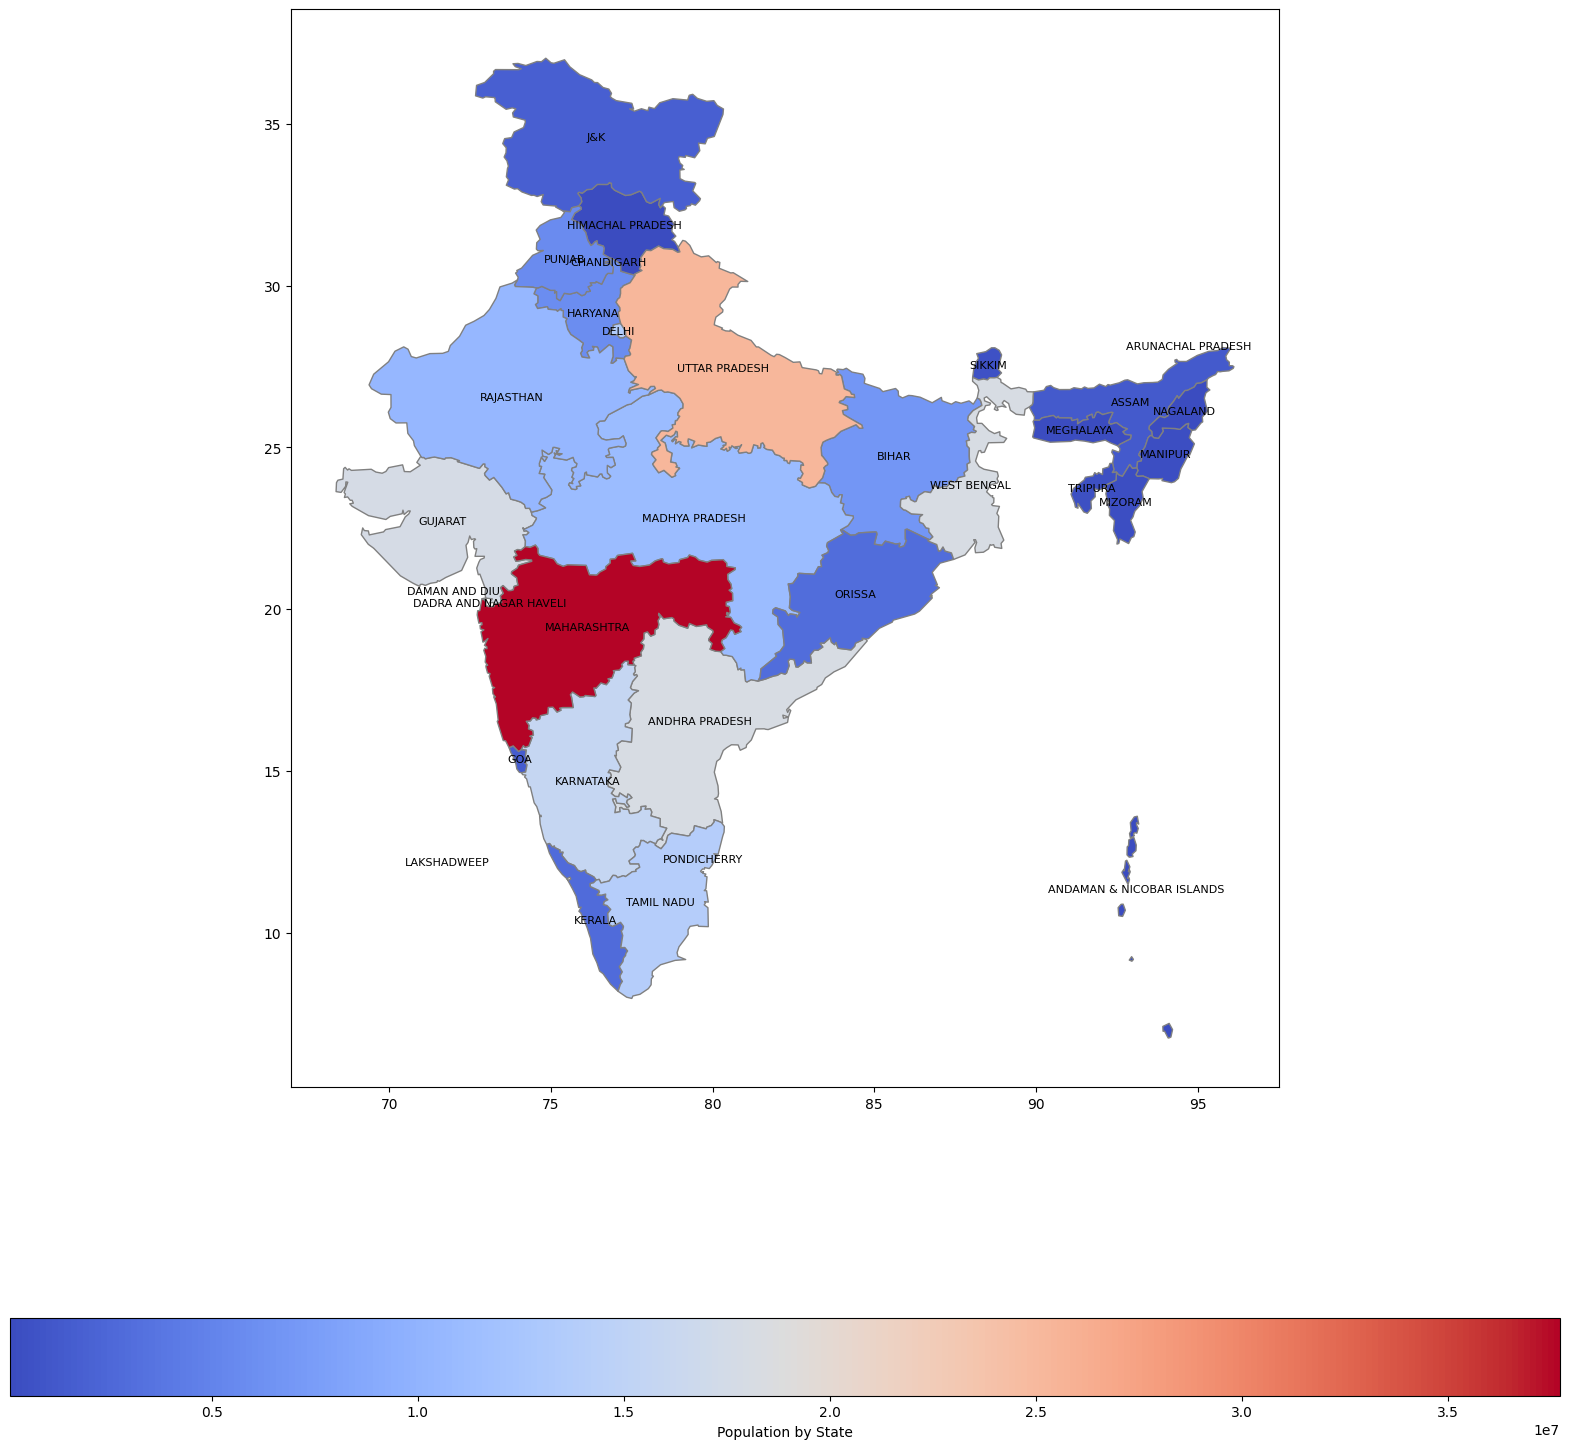

In [10]:
fig, ax = plt.subplots(figsize=(20, 20))
import matplotlib as mpl

for x, y, label in zip(india.geometry.centroid.x, india.geometry.centroid.y, india['STATE']):
    ax.text(x, y, label, fontsize=8, ha='center', va='center',color='black')

merged_data.plot(column='total_population', ax=ax, legend=True,
           cmap='coolwarm',  # Use the chosen colormap
           legend_kwds={'label': "Population by State", 'orientation': "horizontal"},
           edgecolor='gray')  # Add borders around states for visibility

1.2 Female vs Male

In [11]:
merged_data.head()

,STATE,geometry,total_population,population_male,population_female
0,ANDAMAN & NICOBAR ISLANDS,"MULTIPOLYGON (((94.08923 6.73365, 93.97717 6.9...",100608.0,53247.0,47361.0
1,ANDHRA PRADESH,"POLYGON ((82.00063 17.95354, 82.11718 18.02457...",18171615.0,9192368.0,8979247.0
2,ARUNACHAL PRADESH,"POLYGON ((95.61476 27.34745, 95.69234 27.33888...",NaN,NaN,NaN
3,ASSAM,"POLYGON ((92.82207 25.57781, 92.69672 25.61368...",1391154.0,720132.0,671022.0
4,BIHAR,"POLYGON ((84.16946 26.28322, 83.91399 26.38523...",6714516.0,3558722.0,3155794.0


MAP 1

---



What does the map reveal about the relationship between male and female populations across Indian states?

<Axes: >

Text(93.0982717484026, 11.343336275425425, 'ANDAMAN & NICOBAR ISLANDS')

Text(79.59617565014507, 16.54332351357065, 'ANDHRA PRADESH')

Text(94.72733225220136, 28.132528223976607, 'ARUNACHAL PRADESH')

Text(92.9271388470492, 26.397612497881088, 'ASSAM')

Text(85.60796963252363, 24.718691934983056, 'BIHAR')

Text(76.77406498123801, 30.716554414910618, 'CHANDIGARH')

Text(73.10007599890547, 20.197034813921043, 'DADRA AND NAGAR HAVELI')

Text(71.97455336300608, 20.55789799428087, 'DAMAN AND DIU')

Text(77.08704103020217, 28.602072083431086, 'DELHI')

Text(74.03414117560216, 15.365367865772017, 'GOA')

Text(71.65124221889216, 22.721167592967742, 'GUJARAT')

Text(76.30465178511314, 29.162744532604105, 'HARYANA')

Text(77.27558410169368, 31.87136905223448, 'HIMACHAL PRADESH')

Text(76.39163105716874, 34.58588528557358, 'J&K')

Text(76.14916071510407, 14.682612175259626, 'KARNATAKA')

Text(76.37387129331003, 10.391895574912503, 'KERALA')

Text(71.80026872369396, 12.188587089931795, 'LAKSHADWEEP')

Text(79.41696212347553, 22.80833866137315, 'MADHYA PRADESH')

Text(76.1438339700071, 19.429537665139527, 'MAHARASHTRA')

Text(94.01247150568696, 24.776671774599833, 'MANIPUR')

Text(91.36332965049762, 25.542953942070472, 'MEGHALAYA')

Text(92.76087072248562, 23.31719921847137, 'MIZORAM')

Text(94.57258877204666, 26.12079091636268, 'NAGALAND')

Text(84.41680687342608, 20.454856561482977, 'ORISSA')

Text(79.68934352656893, 12.260380305842233, 'PONDICHERRY')

Text(75.42872602123485, 30.825424524824914, 'PUNJAB')

Text(73.78665732026214, 26.56465641532147, 'RAJASTHAN')

Text(88.50688632356626, 27.55312012000883, 'SIKKIM')

Text(78.38979381125563, 10.948648310179593, 'TAMIL NADU')

Text(91.73704466484084, 23.749481177287453, 'TRIPURA')

Text(80.30793542363828, 27.444972964941414, 'UTTAR PRADESH')

Text(87.95797392206615, 23.836746996390776, 'WEST BENGAL')

Text(0.5, 1.0, 'Male Population (Map) and Female Population (Dots)')

(66.97057050000001, 97.50699949999999, 5.21859705, 38.549783950000005)

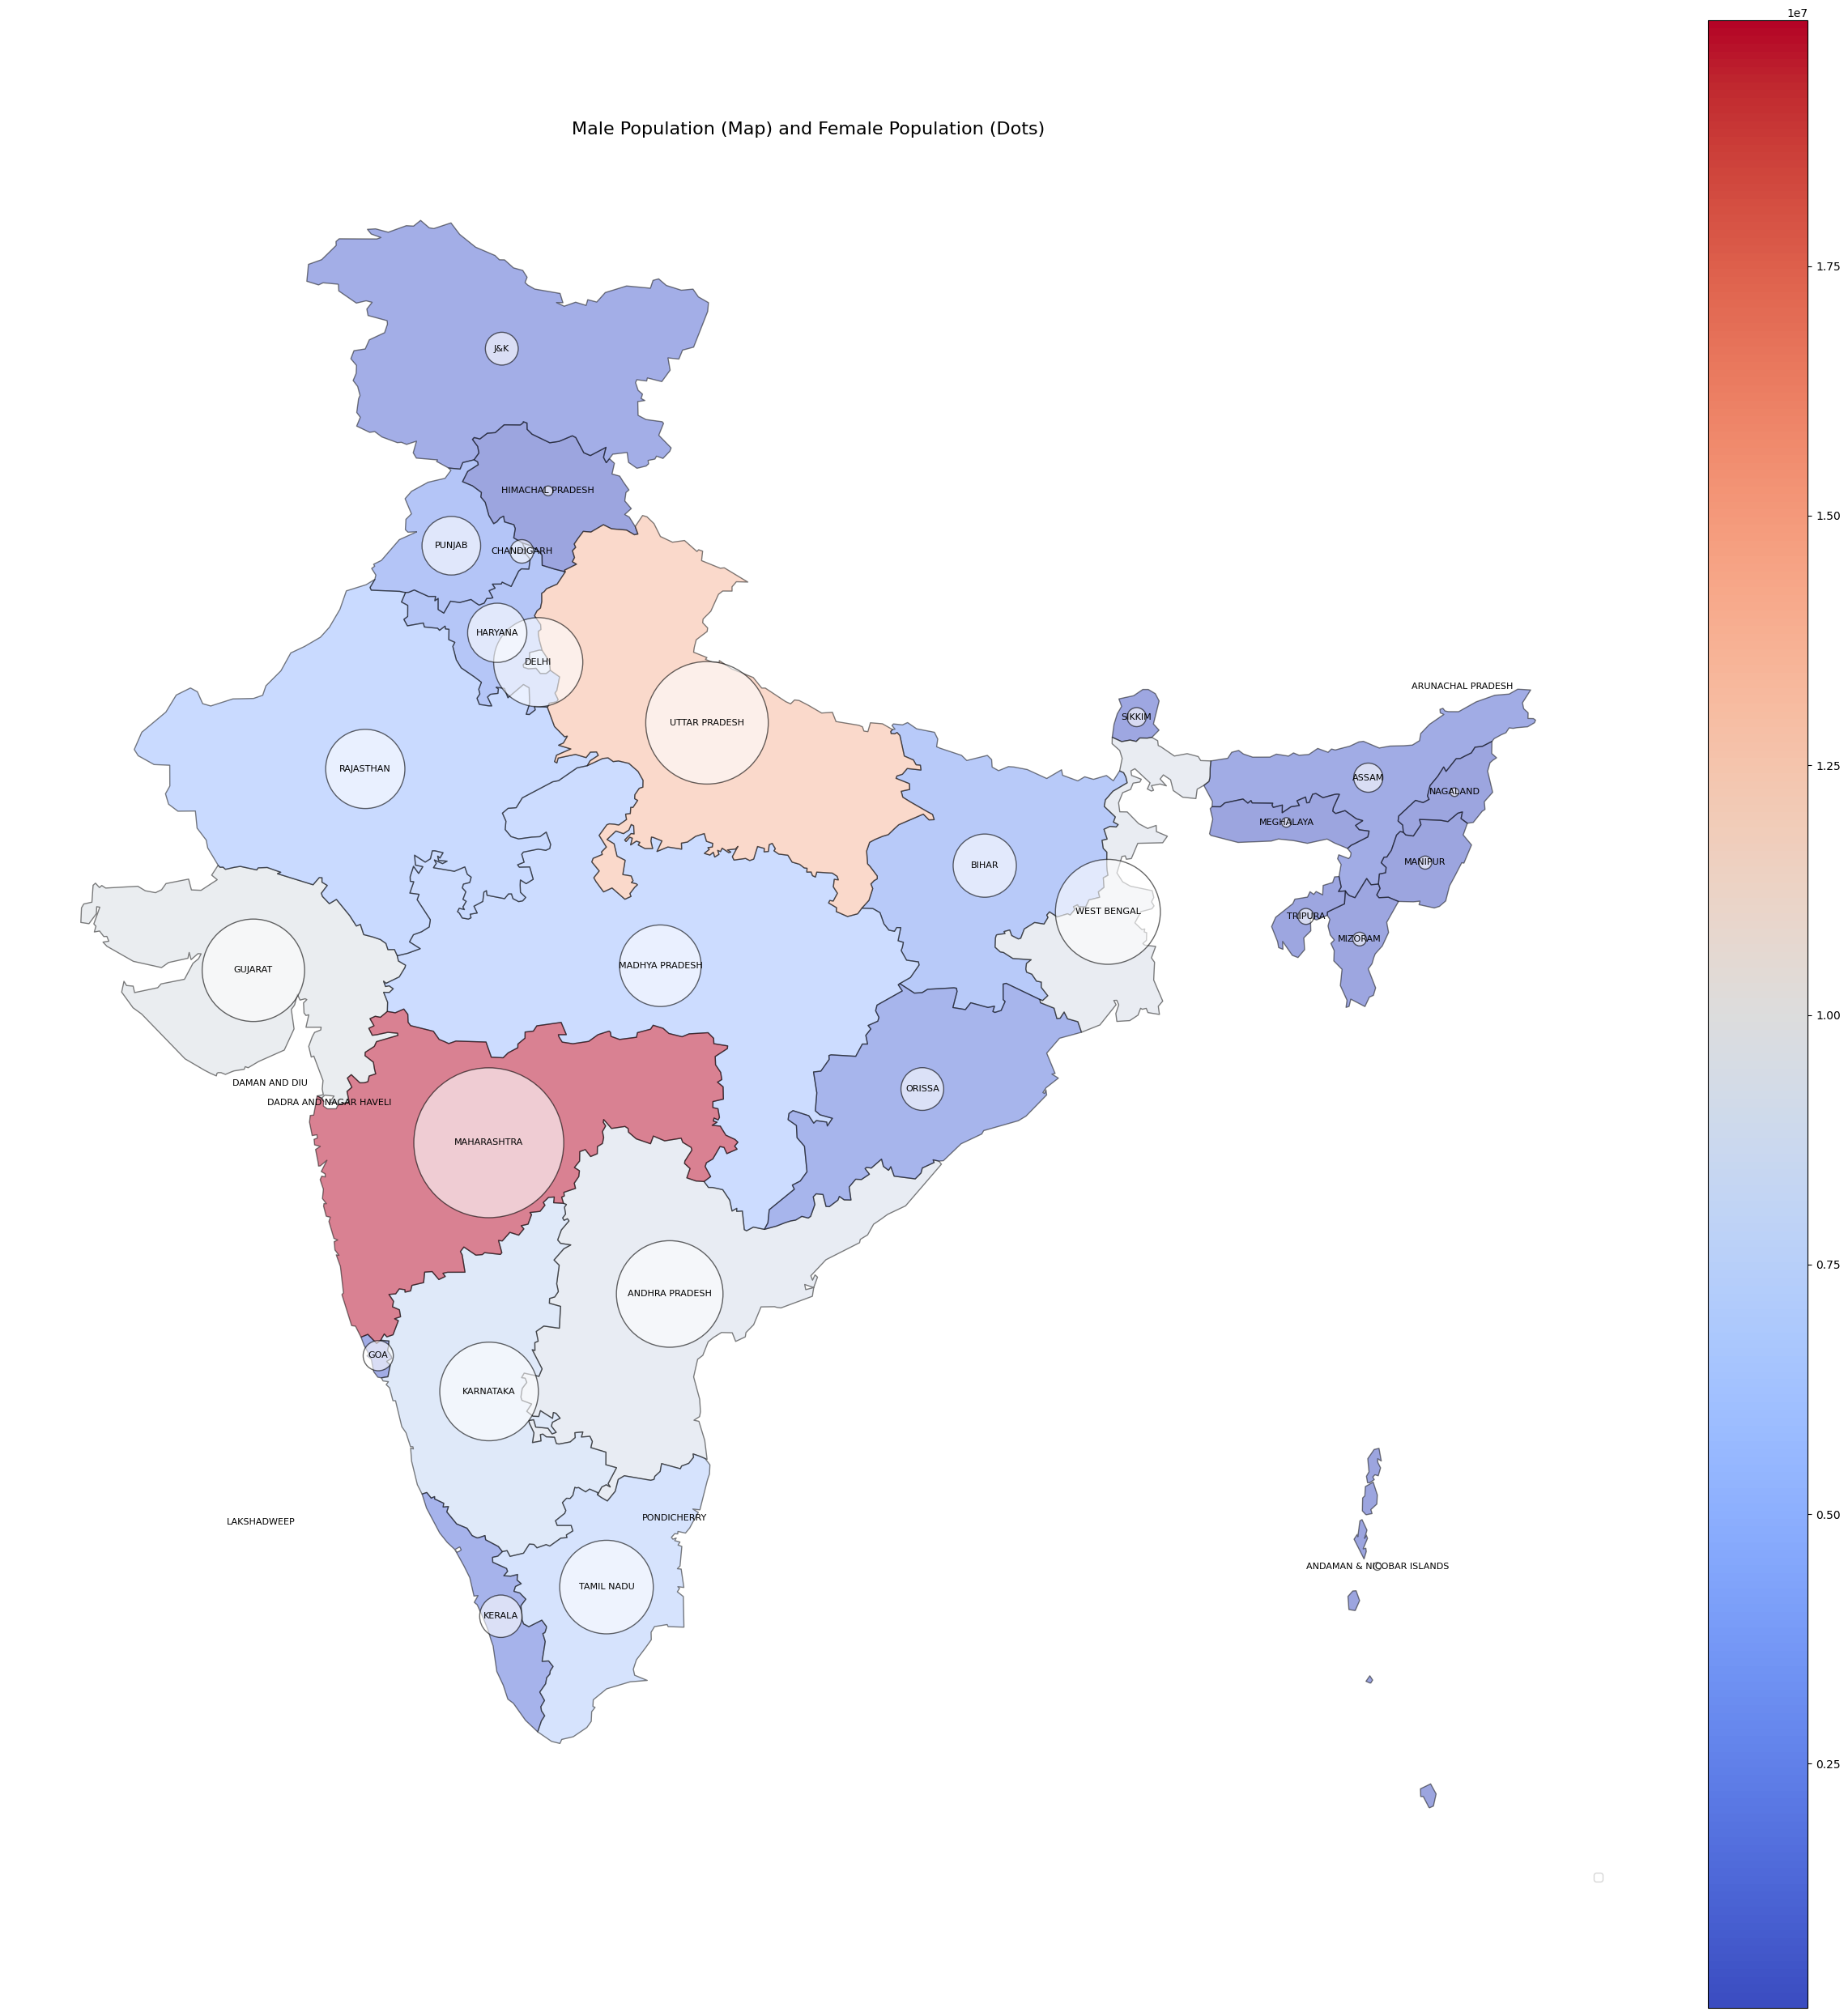

In [12]:
import matplotlib.pyplot as plt

merged_data = merged_data.set_geometry("geometry")
fig, ax = plt.subplots(1, 1, figsize=(25, 25))

merged_data.plot(
    column='population_male',  # Replace with the correct column for male population
    ax=ax,
    cmap='coolwarm',  # Color scheme for male population
    alpha=0.5,  # Make polygons semi-transparent
    legend=True,
    edgecolor='black'
)

for x, y, label in zip(india.geometry.centroid.x, india.geometry.centroid.y, india['STATE']):
    ax.text(x, y, label, fontsize=8, ha='center', va='center',color='black')

merged_data['centroid'] = merged_data.geometry.centroid
merged_data['x'] = merged_data.centroid.x
merged_data['y'] = merged_data.centroid.y

ax.scatter(
    merged_data['x'],
    merged_data['y'],
    c='White',  # Color for female population
    s=merged_data['population_female'] / 1000,  # Scale dot size (adjust as necessary)
    alpha=0.6,  # Make dots semi-transparent
    edgecolor='black',
)

ax.set_title("Male Population (Map) and Female Population (Dots)", fontsize=16)
ax.legend(loc='lower right', fontsize=10)
ax.axis('off')
plt.tight_layout()
plt.show()

This map highlights the spatial distribution of the male population through color intensity, with darker regions indicating higher male populations. Simultaneously, the size of the circles represents the female population, making it easy to compare gender population dynamics across states.

From the map:

Maharashtra stands out with both high male and female populations, as indicated by the strong shading and large circle size.
States like Uttar Pradesh and Bihar have relatively high populations of both genders, with clear disparities in male-to-female ratios.
Northeastern states show smaller overall populations but appear to maintain a closer gender balance.
This visual comparison suggests population densities and gender distribution trends that could have implications for resource allocation and social policies in different regions.

<Axes: >

Text(93.0982717484026, 11.343336275425425, 'ANDAMAN & NICOBAR ISLANDS')

Text(79.59617565014507, 16.54332351357065, 'ANDHRA PRADESH')

Text(94.72733225220136, 28.132528223976607, 'ARUNACHAL PRADESH')

Text(92.9271388470492, 26.397612497881088, 'ASSAM')

Text(85.60796963252363, 24.718691934983056, 'BIHAR')

Text(76.77406498123801, 30.716554414910618, 'CHANDIGARH')

Text(73.10007599890547, 20.197034813921043, 'DADRA AND NAGAR HAVELI')

Text(71.97455336300608, 20.55789799428087, 'DAMAN AND DIU')

Text(77.08704103020217, 28.602072083431086, 'DELHI')

Text(74.03414117560216, 15.365367865772017, 'GOA')

Text(71.65124221889216, 22.721167592967742, 'GUJARAT')

Text(76.30465178511314, 29.162744532604105, 'HARYANA')

Text(77.27558410169368, 31.87136905223448, 'HIMACHAL PRADESH')

Text(76.39163105716874, 34.58588528557358, 'J&K')

Text(76.14916071510407, 14.682612175259626, 'KARNATAKA')

Text(76.37387129331003, 10.391895574912503, 'KERALA')

Text(71.80026872369396, 12.188587089931795, 'LAKSHADWEEP')

Text(79.41696212347553, 22.80833866137315, 'MADHYA PRADESH')

Text(76.1438339700071, 19.429537665139527, 'MAHARASHTRA')

Text(94.01247150568696, 24.776671774599833, 'MANIPUR')

Text(91.36332965049762, 25.542953942070472, 'MEGHALAYA')

Text(92.76087072248562, 23.31719921847137, 'MIZORAM')

Text(94.57258877204666, 26.12079091636268, 'NAGALAND')

Text(84.41680687342608, 20.454856561482977, 'ORISSA')

Text(79.68934352656893, 12.260380305842233, 'PONDICHERRY')

Text(75.42872602123485, 30.825424524824914, 'PUNJAB')

Text(73.78665732026214, 26.56465641532147, 'RAJASTHAN')

Text(88.50688632356626, 27.55312012000883, 'SIKKIM')

Text(78.38979381125563, 10.948648310179593, 'TAMIL NADU')

Text(91.73704466484084, 23.749481177287453, 'TRIPURA')

Text(80.30793542363828, 27.444972964941414, 'UTTAR PRADESH')

Text(87.95797392206615, 23.836746996390776, 'WEST BENGAL')

<Axes: >

<Axes: >

Text(0.5, 1.0, 'The red markers are plotted on the map to draw attention to areas where the ratio of females to males is significantly skewed')

Text(0.5, 652.7222222222224, 'Longitude')

Text(474.3993979962274, 0.5, 'Latitude')

(66.90341350000001, 98.91729649999999, 5.21859705, 38.549783950000005)

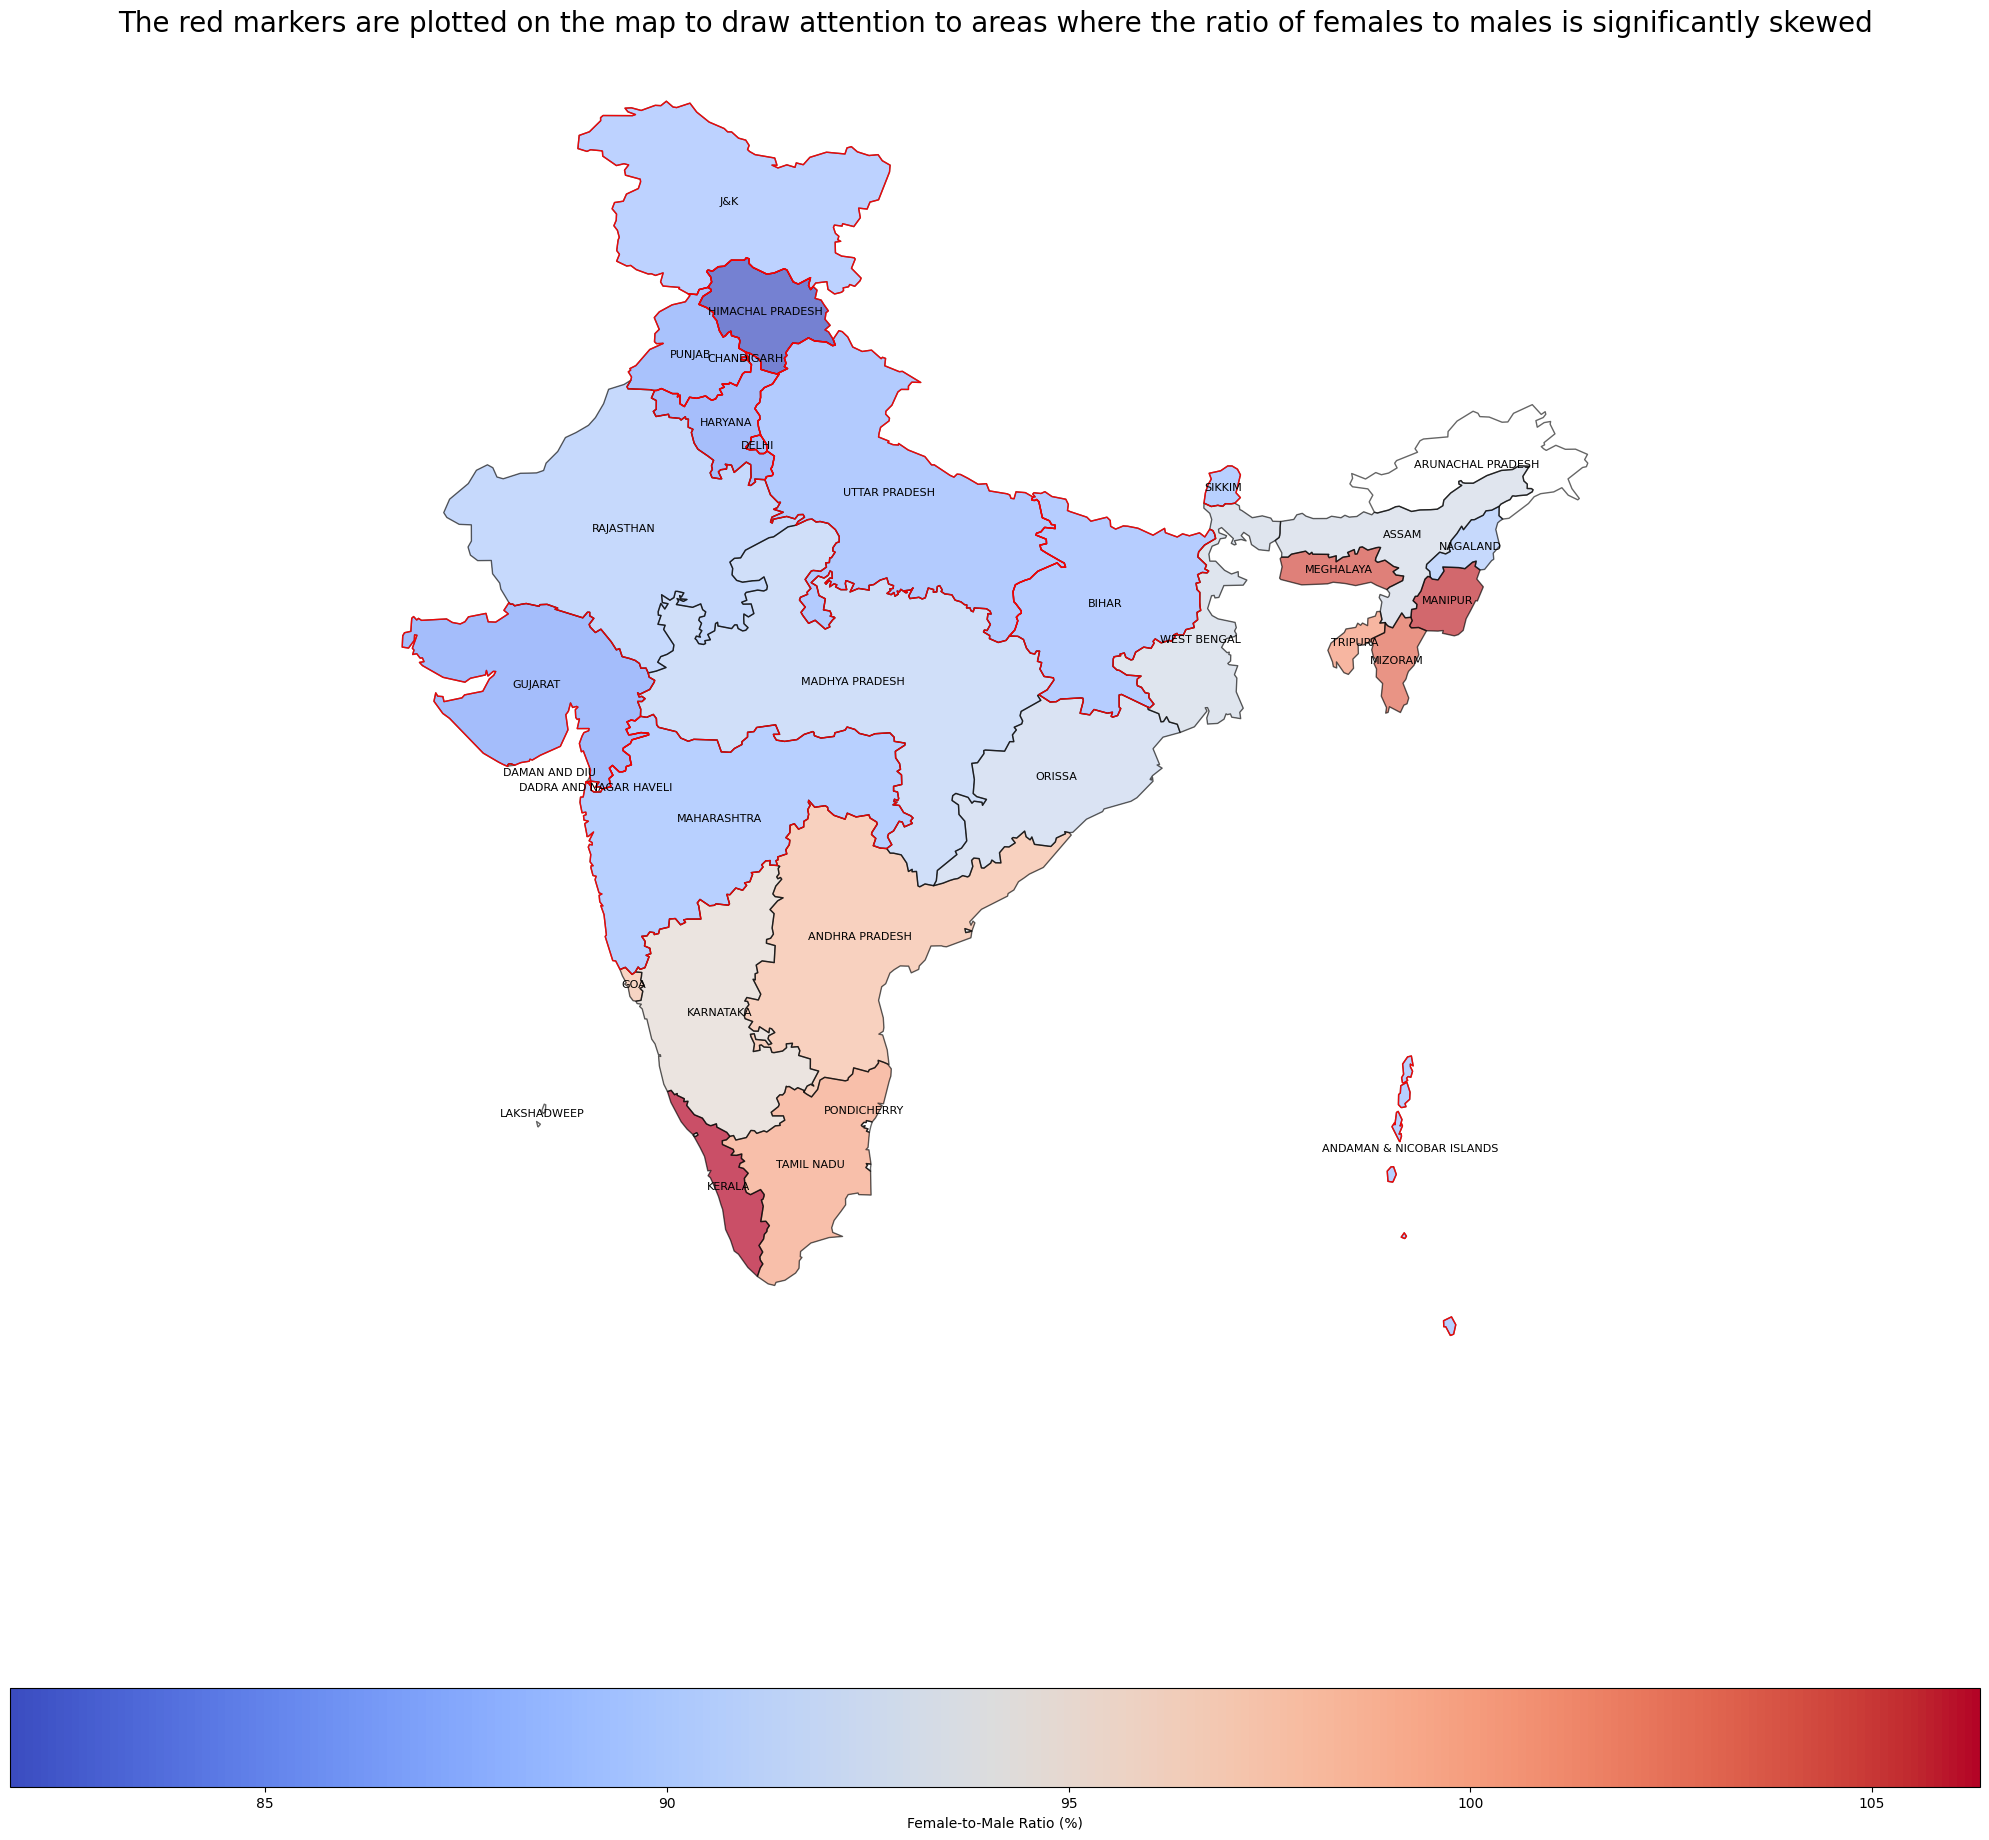

In [13]:
merged_data['FEMALE_TO_MALE_RATIO'] = (merged_data['population_female'] / merged_data['population_male']) * 100

fig, ax = plt.subplots(figsize=(20,20))

merged_data.plot(
    column='FEMALE_TO_MALE_RATIO',  # Female-to-Male ratio
    ax=ax,
    cmap='coolwarm',  # Diverging color palette
    legend=True,
    linewidth=0.1, # Outline color
    legend_kwds={'label': "Female-to-Male Ratio (%)", 'orientation': "horizontal"},
    edgecolor='black',
    alpha=0.7
)

for x, y, label in zip(india.geometry.centroid.x, india.geometry.centroid.y, india['STATE']):
    ax.text(x, y, label, fontsize=8, ha='center', va='center',color='black')

merged_data['circle_size'] = (merged_data['FEMALE_TO_MALE_RATIO'] - 100).abs() * 0.1  # Scale circle size

merged_data.plot(
    ax=ax,
    color='none',  # No fill color
    edgecolor='black',
    markersize=merged_data['circle_size'],  # Circle size based on the ratio difference from 100
    marker='o',  # Circle marker
    alpha=0.6  # Transparency for circles
)

highlight = pd.concat([
    merged_data[merged_data['FEMALE_TO_MALE_RATIO'] > 110],
    merged_data[merged_data['FEMALE_TO_MALE_RATIO'] < 90]
])

highlight.plot(
    ax=ax,
    color='none',
    edgecolor='red',
    markersize=highlight['circle_size'] * 1.5,  # Larger circles for significant deviations
    marker='o',
    alpha=0.9
)

ax.set_title("The red markers are plotted on the map to draw attention to areas where the ratio of females to males is significantly skewed", fontsize=20)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

ax.axis('off')

# Show the plot
plt.tight_layout()
plt.show()

# 2. Life Expectancy

---



2.1 life expectancy at birth

In [14]:
! wget -q -O Expectancy.csv https://docs.google.com/uc?id=1f7g2VDXDi8XW8dZv6yhMt_weOTIDha_y&export=download
Expectancy = pd.read_csv('Expectancy.csv')
Expectancy.head(1)

,Rank,State,Life_Expectancy_at_Birth,Avg_Life_Expectancy,Male,Female
0,13,Andhra Pradesh,68.5,70.25,68.4,72.1


In [15]:
print("Shapefile Columns:", india.columns)
print("Life-Expectancy Columns:", Expectancy.columns)

Shapefile Columns: Index(['STATE', 'geometry'], dtype='object')
Life-Expectancy Columns: Index(['Rank', 'State', 'Life_Expectancy_at_Birth', 'Avg_Life_Expectancy',
       'Male', 'Female'],
      dtype='object')


In [16]:
Expectancy.rename(columns={'State': 'STATE'}, inplace=True)

india['STATE'] = india['STATE'].str.strip().str.upper()
Expectancy['STATE'] = Expectancy['STATE'].str.strip().str.upper()

india['STATE'] = india['STATE'].replace('JAMMU AND KASHMIR', 'J&K')
Expectancy['STATE'] = Expectancy['STATE'].replace('JAMMU & KASHMIR', 'J&K')

india['STATE'] = india['STATE'].replace('ANDAMAN AND NICOBAR ISLANDS', 'ANDAMAN & NICOBAR ISLANDS')
Expectancy['STATE'] = Expectancy['STATE'].replace('ANDAMAN AND NICOBAR ISLANDS', 'ANDAMAN & NICOBAR ISLANDS')

india['STATE'] = india['STATE'].replace('ORISSA', 'ORISSA')
Expectancy['STATE'] = Expectancy['STATE'].replace('ODISHA', 'ORISSA')

e_data = india.merge(Expectancy[['STATE', 'Life_Expectancy_at_Birth', 'Avg_Life_Expectancy', 'Male', 'Female']],
                     on='STATE', how='left')
print(e_data.head())

                       STATE  \
0  ANDAMAN & NICOBAR ISLANDS   
1             ANDHRA PRADESH   
2          ARUNACHAL PRADESH   
3                      ASSAM   
4                      BIHAR   

                                            geometry  \
0  MULTIPOLYGON (((94.08923 6.73365, 93.97717 6.9...   
1  POLYGON ((82.00063 17.95354, 82.11718 18.02457...   
2  POLYGON ((95.61476 27.34745, 95.69234 27.33888...   
3  POLYGON ((92.82207 25.57781, 92.69672 25.61368...   
4  POLYGON ((84.16946 26.28322, 83.91399 26.38523...   

   Life_Expectancy_at_Birth  Avg_Life_Expectancy  Male  Female  
0                      67.4                67.80  64.1    71.5  
1                      68.5                70.25  68.4    72.1  
2                      64.6                70.25  63.0    66.5  
3                      63.9                66.20  65.6    66.8  
4                      68.1                69.90  69.6    70.2  


In [17]:
print("Life-Expectancy Columns:", e_data.columns)

Life-Expectancy Columns: Index(['STATE', 'geometry', 'Life_Expectancy_at_Birth', 'Avg_Life_Expectancy',
       'Male', 'Female'],
      dtype='object')


Text(93.0982717484026, 11.343336275425425, 'ANDAMAN & NICOBAR ISLANDS')

Text(79.59617565014507, 16.54332351357065, 'ANDHRA PRADESH')

Text(94.72733225220136, 28.132528223976607, 'ARUNACHAL PRADESH')

Text(92.9271388470492, 26.397612497881088, 'ASSAM')

Text(85.60796963252363, 24.718691934983056, 'BIHAR')

Text(76.77406498123801, 30.716554414910618, 'CHANDIGARH')

Text(73.10007599890547, 20.197034813921043, 'DADRA AND NAGAR HAVELI')

Text(71.97455336300608, 20.55789799428087, 'DAMAN AND DIU')

Text(77.08704103020217, 28.602072083431086, 'DELHI')

Text(74.03414117560216, 15.365367865772017, 'GOA')

Text(71.65124221889216, 22.721167592967742, 'GUJARAT')

Text(76.30465178511314, 29.162744532604105, 'HARYANA')

Text(77.27558410169368, 31.87136905223448, 'HIMACHAL PRADESH')

Text(76.39163105716874, 34.58588528557358, 'J&K')

Text(76.14916071510407, 14.682612175259626, 'KARNATAKA')

Text(76.37387129331003, 10.391895574912503, 'KERALA')

Text(71.80026872369396, 12.188587089931795, 'LAKSHADWEEP')

Text(79.41696212347553, 22.80833866137315, 'MADHYA PRADESH')

Text(76.1438339700071, 19.429537665139527, 'MAHARASHTRA')

Text(94.01247150568696, 24.776671774599833, 'MANIPUR')

Text(91.36332965049762, 25.542953942070472, 'MEGHALAYA')

Text(92.76087072248562, 23.31719921847137, 'MIZORAM')

Text(94.57258877204666, 26.12079091636268, 'NAGALAND')

Text(84.41680687342608, 20.454856561482977, 'ORISSA')

Text(79.68934352656893, 12.260380305842233, 'PONDICHERRY')

Text(75.42872602123485, 30.825424524824914, 'PUNJAB')

Text(73.78665732026214, 26.56465641532147, 'RAJASTHAN')

Text(88.50688632356626, 27.55312012000883, 'SIKKIM')

Text(78.38979381125563, 10.948648310179593, 'TAMIL NADU')

Text(91.73704466484084, 23.749481177287453, 'TRIPURA')

Text(80.30793542363828, 27.444972964941414, 'UTTAR PRADESH')

Text(87.95797392206615, 23.836746996390776, 'WEST BENGAL')

<Axes: >

Text(0.5, 1.0, 'Life Expectancy at Birth by State in India')

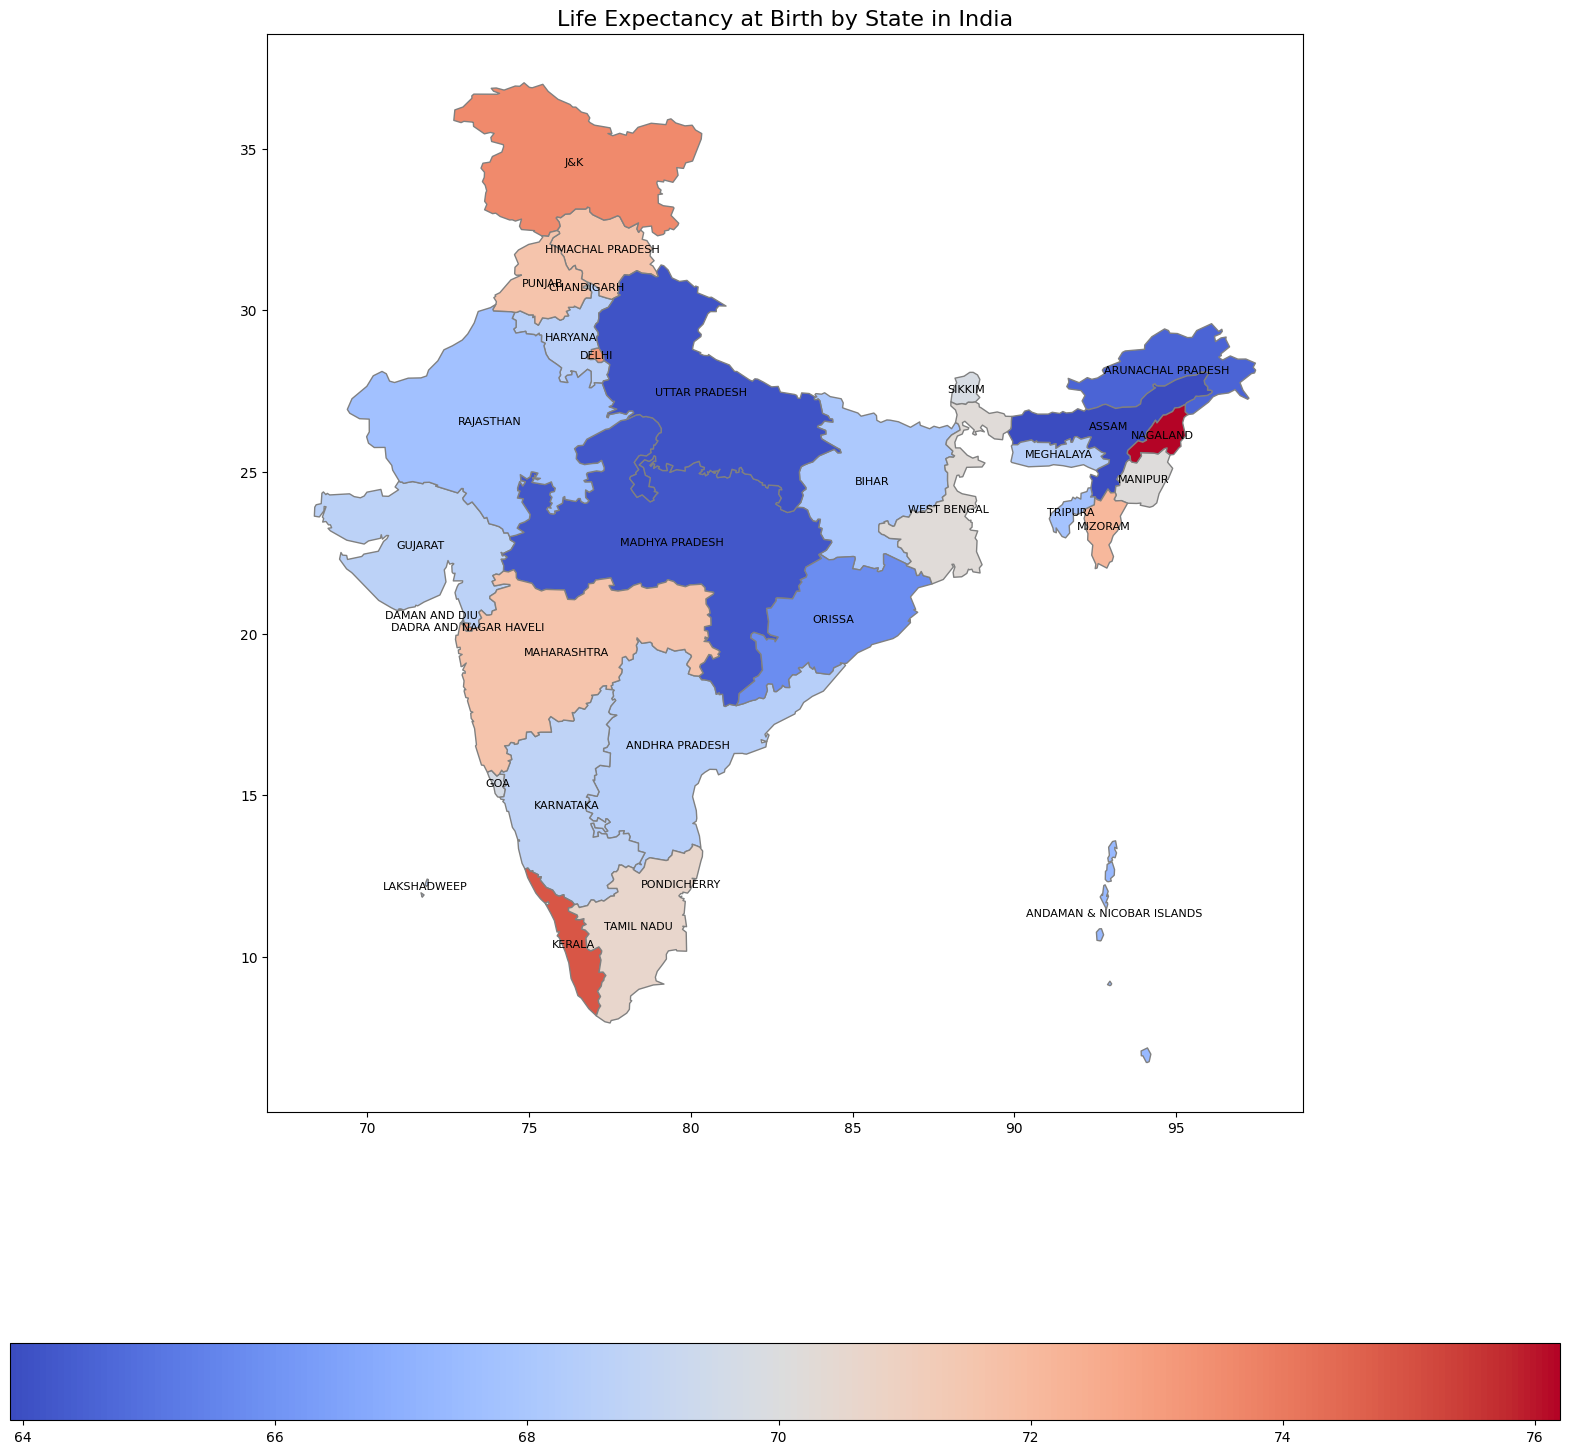

In [18]:
fig, ax = plt.subplots(figsize=(20, 20))
import matplotlib as mpl

for x, y, label in zip(e_data.geometry.centroid.x, e_data.geometry.centroid.y, e_data['STATE']):
    ax.text(x, y, label, fontsize=8, ha='center', va='center',color='black')

e_data.plot(column='Life_Expectancy_at_Birth', ax=ax, legend=True,
           cmap='coolwarm',  # Use the chosen colormap
           legend_kwds={'label': "", 'orientation': "horizontal"},
           edgecolor='gray')  # Add borders around states for visibility

ax.set_title('Life Expectancy at Birth by State in India', fontsize=16)

Map2

---



How does life expectancy vary across Indian states, and how does it compare to national and global averages?

Text(93.0982717484026, 11.343336275425425, 'ANDAMAN & NICOBAR ISLANDS\n67.8 yrs')

Text(79.59617565014507, 16.54332351357065, 'ANDHRA PRADESH\n70.2 yrs')

Text(94.72733225220136, 28.132528223976607, 'ARUNACHAL PRADESH\n70.2 yrs')

Text(92.9271388470492, 26.397612497881088, 'ASSAM\n66.2 yrs')

Text(85.60796963252363, 24.718691934983056, 'BIHAR\n69.9 yrs')

Text(76.77406498123801, 30.716554414910618, 'CHANDIGARH\nnan yrs')

Text(73.10007599890547, 20.197034813921043, 'DADRA AND NAGAR HAVELI\n67.8 yrs')

Text(71.97455336300608, 20.55789799428087, 'DAMAN AND DIU\n70.2 yrs')

Text(77.08704103020217, 28.602072083431086, 'DELHI\n72.8 yrs')

Text(74.03414117560216, 15.365367865772017, 'GOA\n67.8 yrs')

Text(71.65124221889216, 22.721167592967742, 'GUJARAT\n69.5 yrs')

Text(76.30465178511314, 29.162744532604105, 'HARYANA\n69.6 yrs')

Text(77.27558410169368, 31.87136905223448, 'HIMACHAL PRADESH\n72.3 yrs')

Text(76.39163105716874, 34.58588528557358, 'J&K\n73.5 yrs')

Text(76.14916071510407, 14.682612175259626, 'KARNATAKA\n71.2 yrs')

Text(76.37387129331003, 10.391895574912503, 'KERALA\n75.1 yrs')

Text(71.80026872369396, 12.188587089931795, 'LAKSHADWEEP\n70.2 yrs')

Text(79.41696212347553, 22.80833866137315, 'MADHYA PRADESH\n66.9 yrs')

Text(76.1438339700071, 19.429537665139527, 'MAHARASHTRA\n72.2 yrs')

Text(94.01247150568696, 24.776671774599833, 'MANIPUR\n70.2 yrs')

Text(91.36332965049762, 25.542953942070472, 'MEGHALAYA\n67.8 yrs')

Text(92.76087072248562, 23.31719921847137, 'MIZORAM\n68.3 yrs')

Text(94.57258877204666, 26.12079091636268, 'NAGALAND\n67.8 yrs')

Text(84.41680687342608, 20.454856561482977, 'ORISSA\n68.0 yrs')

Text(79.68934352656893, 12.260380305842233, 'PONDICHERRY\nnan yrs')

Text(75.42872602123485, 30.825424524824914, 'PUNJAB\n72.5 yrs')

Text(73.78665732026214, 26.56465641532147, 'RAJASTHAN\n70.2 yrs')

Text(88.50688632356626, 27.55312012000883, 'SIKKIM\n70.2 yrs')

Text(78.38979381125563, 10.948648310179593, 'TAMIL NADU\n71.4 yrs')

Text(91.73704466484084, 23.749481177287453, 'TRIPURA\n70.2 yrs')

Text(80.30793542363828, 27.444972964941414, 'UTTAR PRADESH\n68.3 yrs')

Text(87.95797392206615, 23.836746996390776, 'WEST BENGAL\n70.8 yrs')

<Axes: >

Text(0.5, 1.0, 'Life Expectancy Of Indian States')

Text(0.5, 0.1, 'Average Life Expectancy\nIndia = 66.8 years\nWorld = 70 years')

(66.90341350000001, 98.91729649999999, 5.21859705, 38.549783950000005)

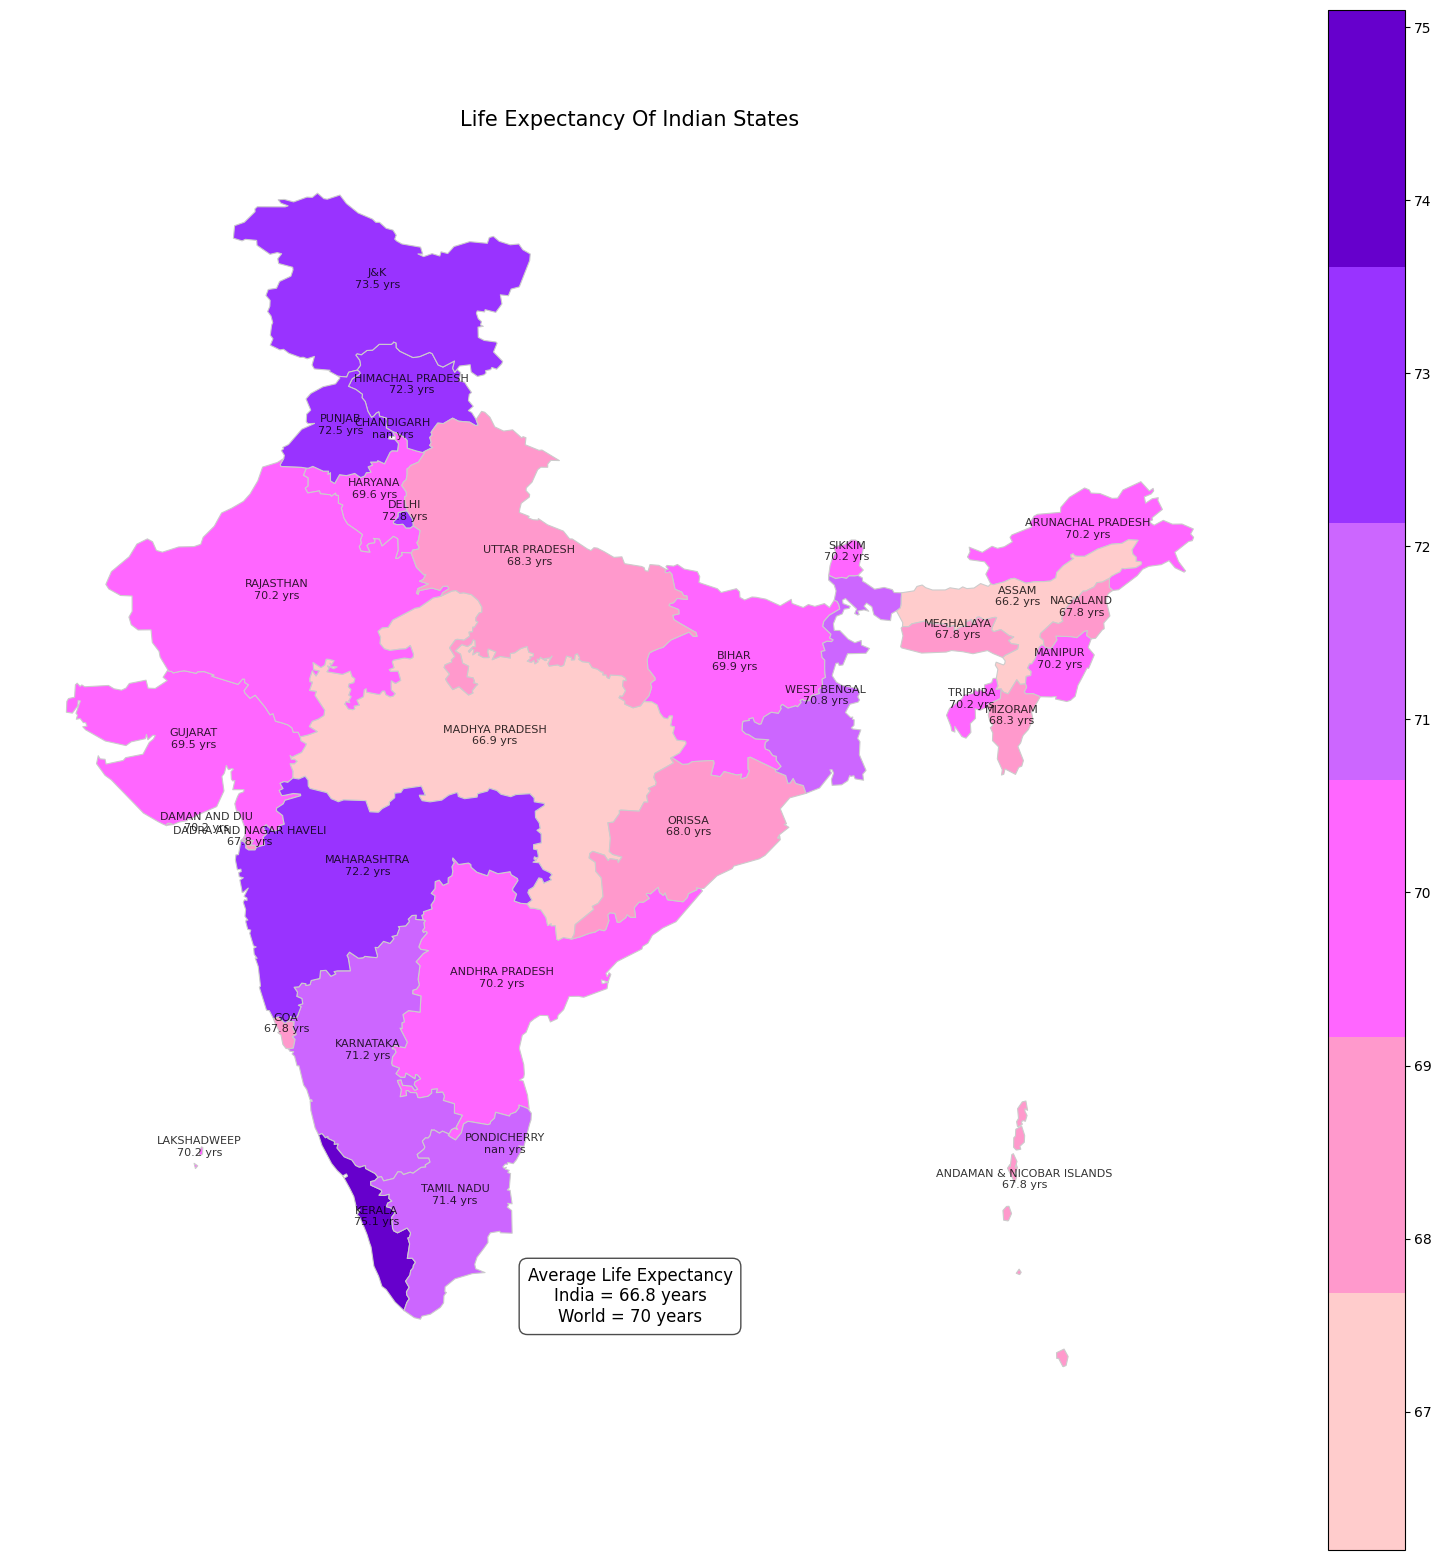

In [19]:
import matplotlib.colors as mcolors
fig, ax = plt.subplots(1, 1, figsize=(20, 20))

bins = [61, 64, 67, 70, 73, 76, 79]
colors = ['#ffcccc', '#ff99cc', '#ff66ff', '#cc66ff', '#9933ff', '#6600cc']
cmap = mcolors.ListedColormap(colors)

for x, y, state, life_expectancy in zip(e_data.geometry.centroid.x,
                                        e_data.geometry.centroid.y,
                                        e_data['STATE'],
                                        e_data['Avg_Life_Expectancy']):
    label = f"{state}\n{life_expectancy:.1f} yrs"
    ax.text(x, y, label, fontsize=8, ha='center', color='black', alpha=0.8)

e_data.plot(column='Avg_Life_Expectancy', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

ax.set_title('Life Expectancy Of Indian States', fontsize=15)
ax.text(0.5, 0.1, 'Average Life Expectancy\nIndia = 66.8 years\nWorld = 70 years',
        ha='center', va='center', transform=ax.transAxes, fontsize=12,
        bbox=dict(facecolor='white', alpha=0.7, edgecolor='black', boxstyle='round,pad=0.5'))

legend = ax.get_legend()

plt.axis('off')
plt.show()

This map visualizes life expectancy at birth across Indian states, using a gradient to represent the differences in years.

Kerala and Nagaland stand out with the highest life expectancies (75+ years), significantly above the national average of 66.8 years.
States like Bihar and Madhya Pradesh fall below 70 years, showing a disparity in health outcomes within the country.
The map highlights that India's overall average is below the global average of 70 years, pointing to the need for focused health interventions in lower-performing states.
By displaying these regional differences, the map provides a clear narrative of inequality in health standards and life outcomes across India.

#3. Literacy

In [20]:
! wget -q -O GOI.csv https://docs.google.com/uc?id=1lNm2G5o35-3XC0ZbN2dq8tyTSLYStrAp&export=download
lit = pd.read_csv('GOI.csv')
lit.head(1)

,Category,Country/ States/ Union Territories Name,Literacy Rate (Persons) - Total - 2001,Literacy Rate (Persons) - Total - 2011,Literacy Rate (Persons) - Rural - 2001,Literacy Rate (Persons) - Rural - 2011,Literacy Rate (Persons) - Urban - 2001,Literacy Rate (Persons) - Urban - 2011
0,Country,INDIA,64.8,73.0,58.7,67.8,79.9,84.1


In [21]:
lit.isnull().sum() # See if we have any null values.
lit['Total - Per. Change'] = (lit.loc[:,'Literacy Rate (Persons) - Total - 2011'] -
                lit.loc[:,'Literacy Rate (Persons) - Total - 2001'])/lit.loc[:,'Literacy Rate (Persons) - Total - 2001']
lit['Rural - Per. Change'] = (lit.loc[:,'Literacy Rate (Persons) - Rural - 2011'] -
                lit.loc[:,'Literacy Rate (Persons) - Rural - 2001'])/lit.loc[:,'Literacy Rate (Persons) - Total - 2001']
lit['Urban - Per. Change'] = (lit.loc[:,'Literacy Rate (Persons) - Urban - 2011'] -
                lit.loc[:,'Literacy Rate (Persons) - Urban - 2001'])/lit.loc[:,'Literacy Rate (Persons) - Total - 2001']
new_col=[]
for i in lit.columns:
    new_col.append(i.split('(Persons) - ')[-1])
lit.columns=new_col
lit.head()

,0
Category,0
Country/ States/ Union Territories Name,0
Literacy Rate (Persons) - Total - 2001,0
Literacy Rate (Persons) - Total - 2011,0
Literacy Rate (Persons) - Rural - 2001,0
Literacy Rate (Persons) - Rural - 2011,0
Literacy Rate (Persons) - Urban - 2001,0
Literacy Rate (Persons) - Urban - 2011,0


,Category,Country/ States/ Union Territories Name,Total - 2001,Total - 2011,Rural - 2001,Rural - 2011,Urban - 2001,Urban - 2011,Total - Per. Change,Rural - Per. Change,Urban - Per. Change
0,Country,INDIA,64.8,73.0,58.7,67.8,79.9,84.1,0.126543,0.140432,0.064815
1,State,Andhra Pradesh,60.5,67.0,54.5,60.4,76.1,80.1,0.107438,0.097521,0.066116
2,State,Arunachal Pradesh,54.3,65.4,47.8,59.9,78.3,82.9,0.204420,0.222836,0.084715
3,State,Assam,63.3,72.2,59.7,69.3,85.3,88.5,0.140600,0.151659,0.050553
4,State,Bihar,47.0,61.8,43.9,59.8,71.9,76.9,0.314894,0.338298,0.106383


3.1 Total Literacy Rate Across Nation:

How did the literacy rates (or similar metric) change across Indian states and union territories between 2001 and 2011?

In [22]:
import plotly.graph_objects as go
lit.sort_values(by='Total - 2001', inplace=True)

fig = go.Figure(data = [
    go.Scatter(name='2001', x=lit['Country/ States/ Union Territories Name'], y=lit['Total - 2001'], mode='markers'),
    go.Scatter(name='2011', x=lit['Country/ States/ Union Territories Name'], y=lit['Total - 2011'], mode='markers')
])

fig.show()

The chart shows a general improvement in the metric (likely literacy rates) from 2001 to 2011 across all Indian states and union territories. Each state or union territory has two data points, one for 2001 (blue) and one for 2011 (red). The red points (2011) are consistently higher than the blue points (2001), indicating progress over the decade. Kerala appears to lead with the highest values, while Bihar shows the lowest.

This suggests that although all states made progress, the extent of improvement varied, with some states starting from a significantly lower base.

In [23]:
print("Shapefile Columns:", lit.columns)

Shapefile Columns: Index(['Category', 'Country/ States/ Union Territories Name', 'Total - 2001',
       'Total - 2011', 'Rural - 2001', 'Rural - 2011', 'Urban - 2001',
       'Urban - 2011', 'Total - Per. Change', 'Rural - Per. Change',
       'Urban - Per. Change'],
      dtype='object')


Which Indian states and union territories showed the highest and lowest percentage literacy changes in the observed metric over time?

In [24]:
import plotly.express as px #Easy way to plot charts
px.bar(lit.sort_values(by='Total - Per. Change'),
       x='Country/ States/ Union Territories Name', y='Total - Per. Change',
       color='Total - Per. Change', title='Total Per. Change')

The bar chart displays the percentage change in a specific metric (likely literacy rates or population growth) across Indian states and union territories.

Highest Percentage Change:
The union territories Dadra & Nagar Haveli and the state Bihar show the largest changes, with values exceeding 0.3 (30%).

Lowest Percentage Change:
Kerala and Mizoram show the smallest changes, both below 0.05 (5%), indicating they had either little room for improvement or were already high-performing.

This indicates that regions with initially lower performance had the most significant improvements, while well-performing regions saw relatively minor changes.

In [25]:
print(lit.columns)

Index(['Category', 'Country/ States/ Union Territories Name', 'Total - 2001',
       'Total - 2011', 'Rural - 2001', 'Rural - 2011', 'Urban - 2001',
       'Urban - 2011', 'Total - Per. Change', 'Rural - Per. Change',
       'Urban - Per. Change'],
      dtype='object')


3.2 Literacy rate vs Unemployment

How do unemployment rates and literacy rates vary across Indian states?






In [26]:
! wget -q -O LiteracyRate.csv https://docs.google.com/uc?id=1NnanxAFeZTxjEoQqg35auuhfDnWtjUhN&export=download
litR = pd.read_csv('LiteracyRate.csv')
litR.head(1)
! wget -q -O Unemployment.csv https://docs.google.com/uc?id=1pZZ9rK2gfpLUQF0miiSVLmfm4dVqK1Gx&export=download
unemploy = pd.read_csv('Unemployment.csv')
unemploy.head(1)

,index,States & Union Territories,Male Literacy Rate %,Female Literacy Rate %,Avarage Literacy Rate %
0,1,A&N islands,90.11,81.84,86.27


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural


In [27]:
print("Shapefile Columns:", india.columns)
print("LITERACY Data Columns:", litR.columns)
print("UNEMPLOYMENT Data Columns:", unemploy.columns)

Shapefile Columns: Index(['STATE', 'geometry'], dtype='object')
LITERACY Data Columns: Index(['index', 'States & Union Territories', 'Male Literacy Rate %',
       'Female Literacy Rate %', 'Avarage Literacy Rate %'],
      dtype='object')
UNEMPLOYMENT Data Columns: Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')


In [28]:
india['STATE'] = india['STATE'].str.upper()
litR['States & Union Territories'] = litR['States & Union Territories'].str.upper()
unemploy['Region'] = unemploy['Region'].str.upper()

litR['States & Union Territories'] = litR['States & Union Territories'].str.strip()

india['STATE'] = india['STATE'].replace('JAMMU AND KASHMIR', 'J&K')
litR['States & Union Territories'] = litR['States & Union Territories'].replace('JAMMU & KASHMIR', 'J&K')
unemploy['Region'] = unemploy['Region'].replace('JAMMU & KASHMIR', 'J&K')

india['STATE'] = india['STATE'].replace('ANDAMAN AND NICOBAR ISLANDS', 'ANDAMAN & NICOBAR ISLANDS')
litR['States & Union Territories'] = litR['States & Union Territories'].replace('A&N ISLANDS', 'ANDAMAN & NICOBAR ISLANDS')
unemploy['Region'] = unemploy['Region'].replace('ANDAMAN AND NICOBAR ISLANDS', 'ANDAMAN & NICOBAR ISLANDS')

india['STATE'] = india['STATE'].replace('ORISSA', 'ORISSA')
litR['States & Union Territories'] = litR['States & Union Territories'].replace('ODISHA', 'ORISSA')
unemploy['Region'] = unemploy['Region'].replace('ODISHA', 'ORISSA')

merged= india.merge(litR[['States & Union Territories', 'Avarage Literacy Rate %']],
                                    left_on='STATE', right_on='States & Union Territories', how='left')

unemploy['Region'] = unemploy['Region'].str.strip()

final = merged.merge(unemploy[['Region', ' Estimated Unemployment Rate (%)']],
                               left_on='STATE', right_on='Region', how='left')
final = final.rename(columns={
    'Avarage Literacy Rate %': 'Literacy_Rate',
    ' Estimated Unemployment Rate (%)': 'Unemployment_Rate'
})

print(final.head())
final_gdf = gpd.GeoDataFrame(final, geometry='geometry')

                       STATE  \
0  ANDAMAN & NICOBAR ISLANDS   
1             ANDHRA PRADESH   
2             ANDHRA PRADESH   
3             ANDHRA PRADESH   
4             ANDHRA PRADESH   

                                            geometry  \
0  MULTIPOLYGON (((94.08923 6.73365, 93.97717 6.9...   
1  POLYGON ((82.00063 17.95354, 82.11718 18.02457...   
2  POLYGON ((82.00063 17.95354, 82.11718 18.02457...   
3  POLYGON ((82.00063 17.95354, 82.11718 18.02457...   
4  POLYGON ((82.00063 17.95354, 82.11718 18.02457...   

  States & Union Territories  Literacy_Rate          Region  Unemployment_Rate  
0  ANDAMAN & NICOBAR ISLANDS          86.27             NaN                NaN  
1             ANDHRA PRADESH          66.40  ANDHRA PRADESH               3.65  
2             ANDHRA PRADESH          66.40  ANDHRA PRADESH               3.05  
3             ANDHRA PRADESH          66.40  ANDHRA PRADESH               3.75  
4             ANDHRA PRADESH          66.40  ANDHRA PRADESH      

<Axes: >

[]

[]

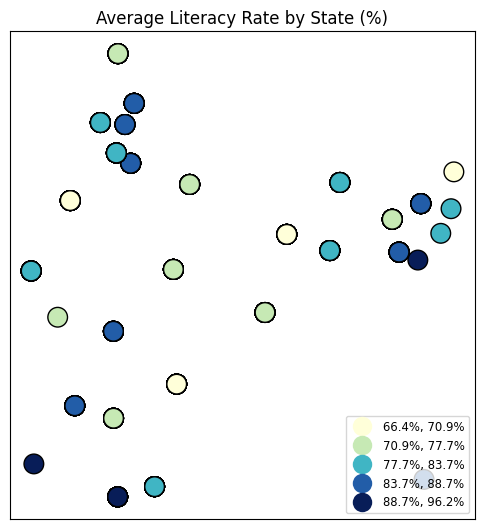

In [29]:
import numpy as np
import matplotlib.pyplot as plt

centroid_gdf = final_gdf.copy()
centroid_gdf["geometry"] = centroid_gdf["geometry"].centroid

fig, ax = plt.subplots(1, figsize=(6, 10))

centroid_gdf.plot(
    ax=ax,
    column="Literacy_Rate",
    legend=True,
    cmap='YlGnBu',  # Color scheme for Literacy Rate
    scheme='natural_breaks',
    k=5,
    edgecolor='black',
    linewidth=1,
    legend_kwds={
        "fmt": "{:,.1f}%",  # Format to one decimal with percentage
        'loc': 'lower right',
        'title_fontsize': 'medium',
        'fontsize': 'small',
        'markerscale': 1.4
    },
    markersize=200  # Size of the centroid points
)

ax.title.set_text("Average Literacy Rate by State (%)")
ax.set_xticks([])  # Hide x-ticks
ax.set_yticks([])  # Hide y-ticks

plt.show()

<Axes: >

<Axes: >

[]

[]

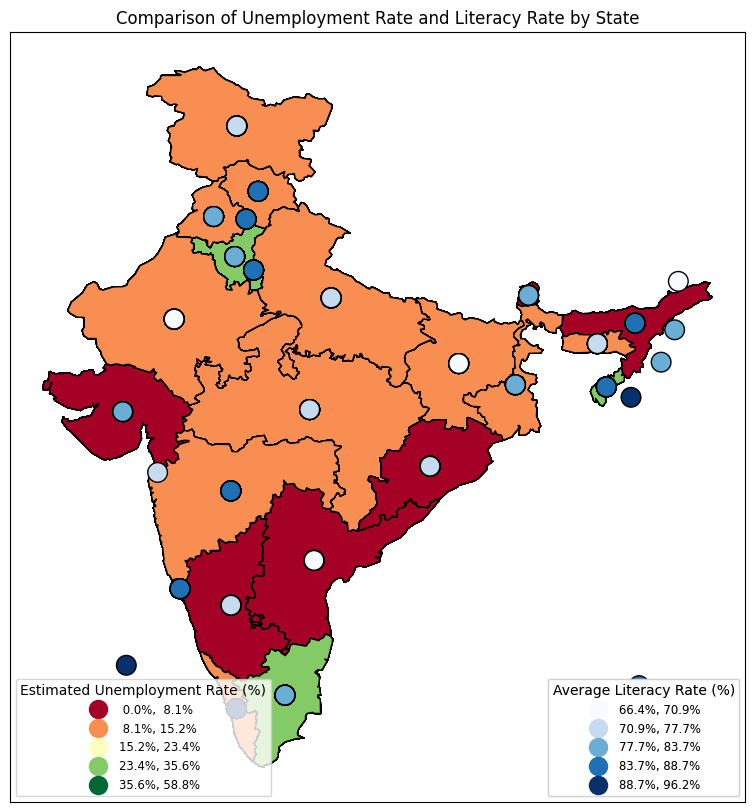

In [30]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, figsize=(10, 10))
final_gdf.plot(
    ax=ax,
    column="Unemployment_Rate",
    legend=True,
    cmap='RdYlGn',  # Color scheme for Unemployment Rate (Red-Yellow-Green)
    scheme='natural_breaks',
    k=5,
    edgecolor='black',
    linewidth=1,
    legend_kwds={
        "fmt": "{:,.1f}%",  # Format as percentage with one decimal
        'loc': 'lower left',
        'title_fontsize': 'medium',
        'fontsize': 'small',
        'markerscale': 1.4
    }
)

l1 = ax.get_legend()
l1.set_title('Estimated Unemployment Rate (%)')
centroid_gdf.plot(
    ax=ax,
    column='Literacy_Rate',
    legend=True,
    cmap='Blues',  # Color scheme for Literacy Rate
    scheme='natural_breaks',
    k=5,
    edgecolor='black',
    linewidth=1,
    legend_kwds={
        "fmt": "{:,.1f}%",  # Format as percentage with one decimal
        'loc': 'lower right',
        'title_fontsize': 'medium',
        'fontsize': 'small',
        'markerscale': 1.4
    },
    markersize=200  # Size of the centroid points
)

l2 = ax.get_legend()
l2.set_title('Average Literacy Rate (%)')
ax.add_artist(l1)
ax.add_artist(l2)
ax.title.set_text("Comparison of Unemployment Rate and Literacy Rate by State")
ax.set_xticks([])  # Remove x-ticks
ax.set_yticks([])  # Remove y-ticks
plt.show()

1.High Literacy, High Unemployment Paradox:

States like Kerala, despite having the highest literacy rates (88.7%–96.2%), also experience moderate to high unemployment rates (15.2%–35.6%).
This indicates that literacy alone is not sufficient to ensure employment opportunities, highlighting the need for better alignment between education and job markets.

2.Low Literacy, Moderate Unemployment States:

States with lower literacy rates (e.g., Bihar and Uttar Pradesh) tend to have moderate unemployment rates (15.2%–23.4%), suggesting that other socio-economic factors (e.g., informal sector jobs) may be influencing employment.

3.Best-Performing Regions:

Some regions (e.g., parts of North-East India) show relatively low unemployment rates (0%–8.1%) and moderate literacy rates (77.7%–83.7%), indicating balanced development or reliance on non-formal employment sectors.

4.Critical Areas:

States like Haryana and Rajasthan, with higher unemployment rates (35.6%–58.8%) and moderate literacy levels, could be key focus areas for policy intervention to improve employment outcomes.

---





---

**1.Literacy Growth:**

Significant literacy improvements, especially in states like Bihar, but high-performing states like Kerala saw slower growth due to near saturation.

**2.Gender Distribution:**

States like Maharashtra show high populations of both genders, while Northeastern states have smaller, more balanced populations.

**3.Life Expectancy:**

Kerala and Nagaland have the highest life expectancies (75+ years), while states like Bihar and Madhya Pradesh are below 70 years, highlighting health disparities.

**4.Unemployment and Literacy:**

High literacy states like Kerala still face unemployment, indicating a gap between education and job opportunities.

**5.Policy Recommendations:**

Focused efforts are needed to address regional disparities in education, health, gender balance, and employment for more inclusive development.

---

